In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lab1_proto as proto

In [2]:
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
data = np.load('lab1_data.npz', allow_pickle=True)['data']

In [3]:
samples = example['samples']
samples.dtype

dtype('int16')

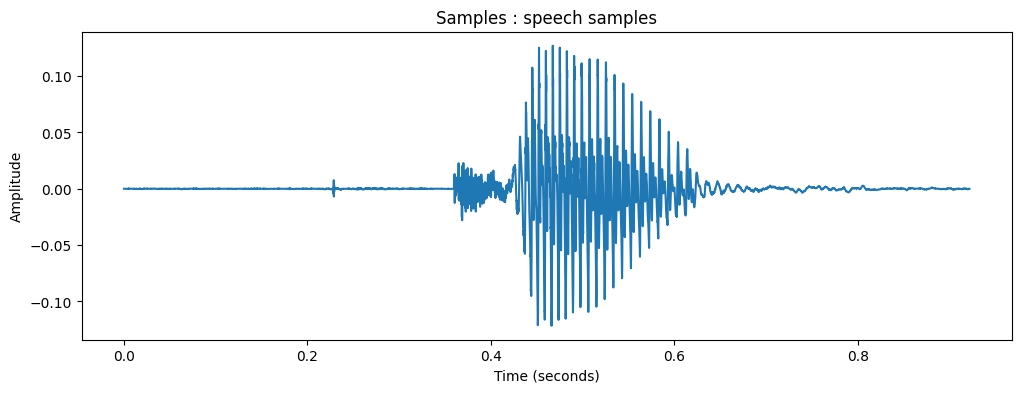

In [4]:
sr = 20000 #20KHz
# Normalize audio to float32 for consistent amplitude values if necessary
if samples.dtype == 'int16':
    samples = samples.astype(np.float32) / np.iinfo(np.int16).max
elif samples.dtype == 'int32':
    samples = samples.astype(np.float32) / np.iinfo(np.int32).max

# Generate time axis in seconds
time = np.linspace(0, len(samples) / sr, num=len(samples))

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time, samples)
plt.title('Samples : speech samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
sr = 20000 #20KHz

# Calculate window length and shift in samples given time values

winlen_time = 0.020  # Window length in seconds 
winshift_time = 0.010  # Window shift in seconds 

winlen_samples = int(winlen_time * sr)  # Convert window length to samples
winshift_samples = int(winshift_time * sr)  # Convert window shift to samples

frames = proto.enframe(samples, winlen_samples, winshift_samples)
print("Shape of frames:", frames.shape)
print("Real Shape of frames:", example["frames"].shape)

Shape of frames: (91, 400)
Real Shape of frames: (91, 400)


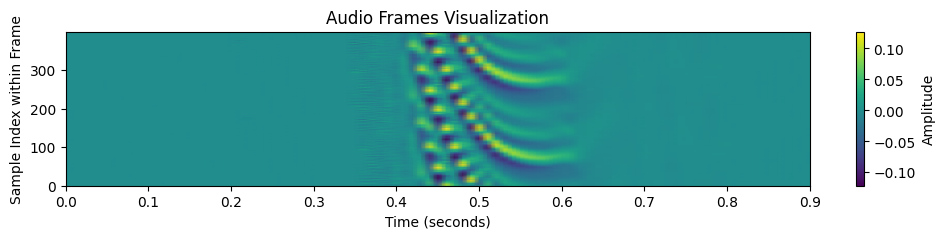

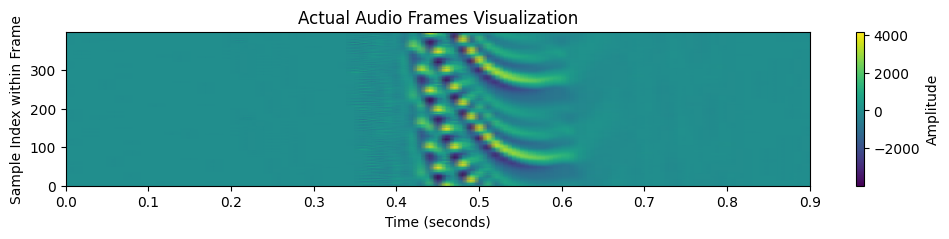

In [6]:
# Calculate the time axis for the frames
frame_times = np.arange(frames.shape[0]) * winshift_time
# Calculate the sample axis for each frame
frame_samples = np.arange(frames.shape[1])


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frame_times, frame_samples, frames.T, shading='gouraud')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio Frames Visualization')
plt.show()

# Calculate the time axis for the frames
frame_times = np.arange(example["frames"].shape[0]) * winshift_time
# Calculate the sample axis for each frame
frame_samples = np.arange(example["frames"].shape[1])

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frame_times, frame_samples, example["frames"].T, shading='gouraud')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio Frames Visualization')
plt.show()

In [8]:
preemph = proto.preemp(frames)

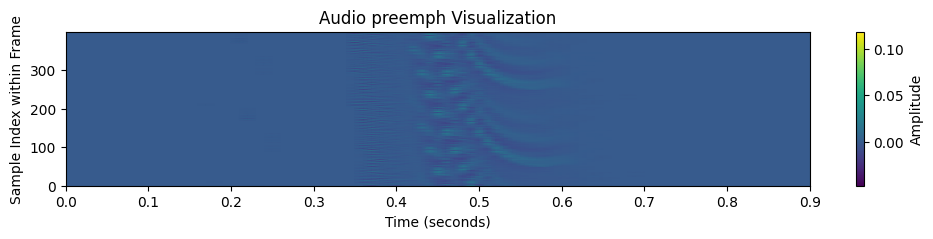

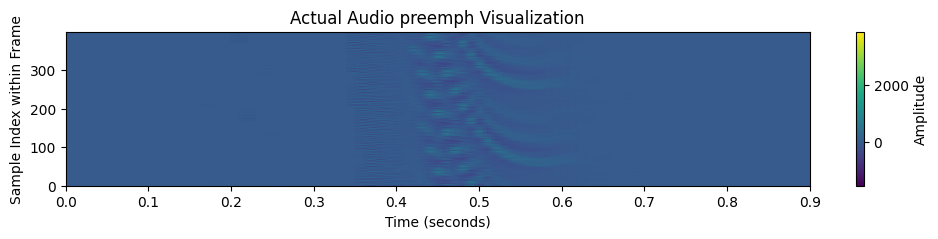

In [11]:
# Calculate the time axis for the frames
frame_times = np.arange(preemph.shape[0]) * winshift_time
# Calculate the sample axis for each frame
frame_samples = np.arange(preemph.shape[1])

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frame_times, frame_samples, preemph.T, shading='gouraud')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio preemph Visualization')
plt.show()


# Calculate the time axis for the frames
frame_times = np.arange(example["preemph"].shape[0]) * winshift_time
# Calculate the sample axis for each frame
frame_samples = np.arange(example["preemph"].shape[1])

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frame_times, frame_samples, example["preemph"].T, shading='gouraud')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio preemph Visualization')
plt.show()